<a href="https://colab.research.google.com/github/Pharaohleft/nba-home-win-prediction/blob/main/scattered.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# Step 1: Fetch the page
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res = requests.get(url)
res.encoding = 'utf-8'  # Force UTF-8 to fix special characters
soup = BeautifulSoup(res.text, "html.parser")

# Step 2: Find the stats table
table = soup.find("table", {"id": "totals_stats"})

# Step 3: Parse the table into a DataFrame

df = pd.read_html(StringIO(str(table)))[0]


# Step 4: Remove duplicate header rows inside the table 
df = df[df["Player"] != "Player"]

# Step 5: Reset index and show sample
df.reset_index(drop=True, inplace=True)
print(df.head())

# Step 6: Save to CSV 
df.to_csv("nba_2024_player_totals.csv", index=False)


    Rk                   Player   Age Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0  DAL  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0  OKC  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0  MIL  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0  NYK  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0  DEN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  588.0  647.0  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  350.0  415.0  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  645.0  841.0  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.0  ...  235.0  278.0  519.0   70.0  13.0  186.0  144.0  2212.0   
4  1411.0  ...  753.0  976.0  708.0  108.0  68.0  237.0  194.0  2085.0   

   Trp-Dbl                        Awards  
0     21.0          MVP-3,CPOY-6,AS,NBA1  
1     

In [ ]:
# 1. Drop header rows mistakenly inside the table
df = df[df["Player"] != "Player"]

# 2. Reset index
df.reset_index(drop=True, inplace=True)

# 3. Convert all numeric columns from object to numbers
for col in df.columns[5:]:  # Skip first few columns like Player, Pos, Team
    df[col] = pd.to_numeric(df[col], errors="coerce")

# 4. Remove duplicate player rows (keep their totals)
df = df.groupby("Player", as_index=False).sum(numeric_only=True)

# 5. Merge back player names and keep only relevant columns
#  Keep only players who played more than 10 games
df = df[df["G"] > 10]

# 6. Show the cleaned data
print(df.head())


          Player     Rk   Age     G    GS      MP     FG    FGA    FG%    3P  \
0     A.J. Green  313.0  24.0  56.0   0.0   614.0   83.0  196.0  0.423  69.0   
1    A.J. Lawson  385.0  23.0  42.0   0.0   311.0   54.0  121.0  0.446  13.0   
2     AJ Griffin  451.0  20.0  20.0   0.0   171.0   18.0   62.0  0.290  10.0   
3   Aaron Gordon   93.0  28.0  73.0  73.0  2297.0  398.0  716.0  0.556  40.0   
4  Aaron Holiday  216.0  27.0  78.0   1.0  1269.0  186.0  417.0  0.446  84.0   

   ...    DRB    TRB    AST   STL   BLK    TOV     PF     PTS  Trp-Dbl  Awards  
0  ...   55.0   64.0   30.0   9.0   4.0   12.0   49.0   252.0      0.0     0.0  
1  ...   36.0   50.0   20.0  10.0   3.0   14.0   22.0   136.0      0.0     0.0  
2  ...   16.0   18.0    5.0   1.0   2.0    8.0    6.0    48.0      0.0     0.0  
3  ...  297.0  471.0  259.0  56.0  45.0  105.0  142.0  1013.0      0.0     0.0  
4  ...  100.0  123.0  140.0  42.0   6.0   53.0  125.0   514.0      0.0     0.0  

[5 rows x 30 columns]


🏀 Top 10 Scorers:
                      Player     PTS
456            Pascal Siakam  3474.0
522             Terry Rozier  2410.0
374              Luka Dončić  2370.0
472               RJ Barrett  2340.0
200        Immanuel Quickley  2312.0
502  Shai Gilgeous-Alexander  2254.0
135          Dennis Schröder  2244.0
184    Giannis Antetokounmpo  2222.0
233            Jalen Brunson  2212.0
435             Nikola Jokić  2085.0

🎯 Top 10 Assist Leaders:
                Player    AST
135    Dennis Schröder  976.0
550  Tyrese Haliburton  752.0
508  Spencer Dinwiddie  712.0
435       Nikola Jokić  708.0
329       Kelly Olynyk  694.0
374        Luka Dončić  686.0
456      Pascal Siakam  684.0
522       Terry Rozier  684.0
149   Domantas Sabonis  673.0
200  Immanuel Quickley  662.0


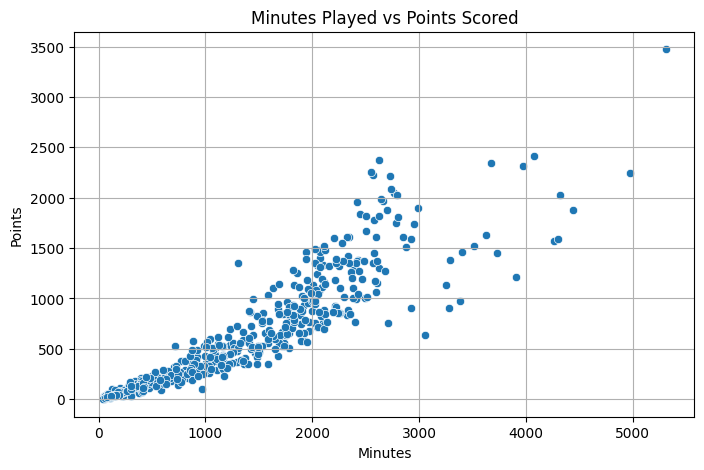

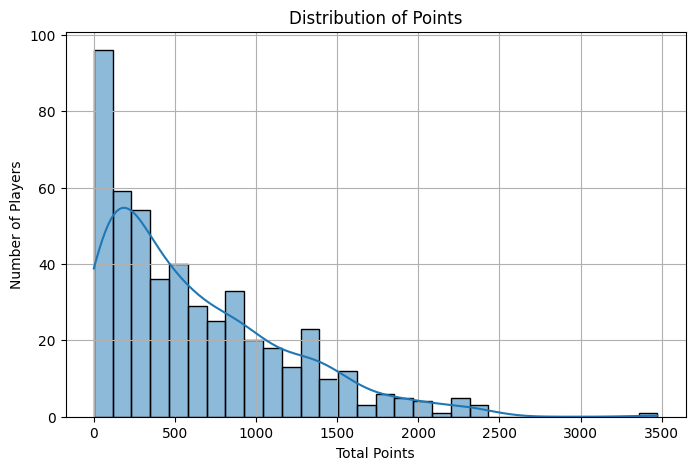

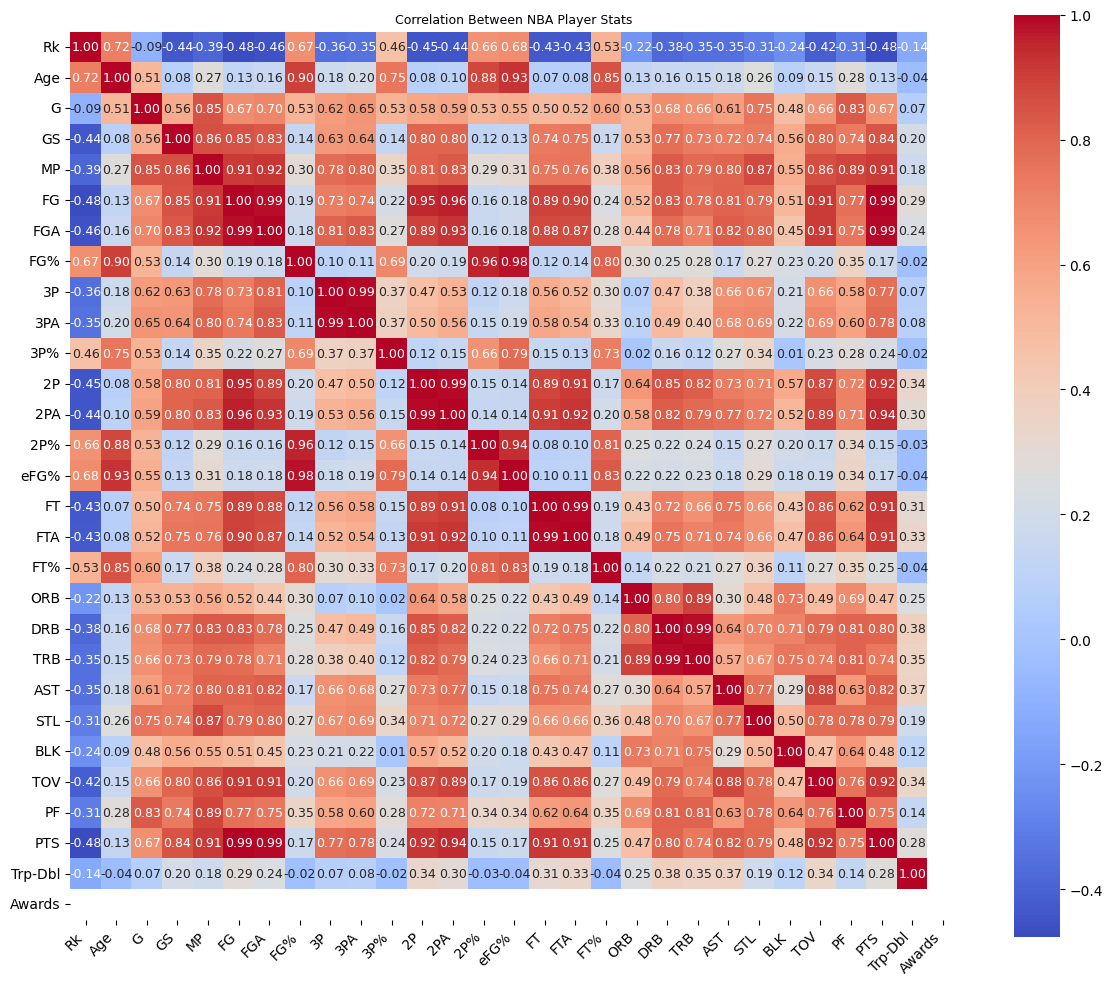

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Top 10 Scorers
top_scorers = df.sort_values("PTS", ascending=False).head(10)
print(" Top 10 Scorers:")
print(top_scorers[["Player", "PTS"]])

# 2. Top 10 Assist Leaders
top_assists = df.sort_values("AST", ascending=False).head(10)
print("\n Top 10 Assist Leaders:")
print(top_assists[["Player", "AST"]])

# 3. Scatterplot: Minutes vs Points
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="MP", y="PTS")
plt.title("Minutes Played vs Points Scored")
plt.xlabel("Minutes")
plt.ylabel("Points")
plt.grid(True)
plt.show()

# 4. Histogram: Points
plt.figure(figsize=(8,5))
sns.histplot(df["PTS"], bins=30, kde=True)
plt.title("Distribution of Points")
plt.xlabel("Total Points")
plt.ylabel("Number of Players")
plt.grid(True)
plt.show()

# 5. Correlation Heatmap (numeric columns only)

plt.figure(figsize=(12, 10))  # Increase figure size

corr = df.select_dtypes("number").corr()

sns.heatmap(corr,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True,
            cbar=True,
            annot_kws={"size": 9})  # make text smaller for clarity

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Correlation Between NBA Player Stats", fontsize=9)
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Load NBA 2024 totals page
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res.encoding = "utf-8"  #  Force correct decoding
soup = BeautifulSoup(res.text, "html.parser")


# Parse the table
table = soup.find("table", {"id": "totals_stats"})
df = pd.read_html(StringIO(str(table)))[0]

# Remove embedded headers
df = df[df["Player"] != "Player"]
df.reset_index(drop=True, inplace=True)

# Convert numeric stats
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Drop players with very few games
df = df[df["G"] >= 10]

# Clean up player names
df["Player"] = df["Player"].str.strip()

df.head()


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Awards
0,1.0,Luka Dončić,24.0,DAL,PG,70.0,70.0,2624.0,804.0,1652.0,...,588.0,647.0,686.0,99.0,38.0,282.0,149.0,2370.0,21.0,NaN
1,2.0,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,2553.0,796.0,1487.0,...,350.0,415.0,465.0,150.0,67.0,162.0,184.0,2254.0,0.0,NaN
2,3.0,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,2567.0,837.0,1369.0,...,645.0,841.0,476.0,87.0,79.0,250.0,210.0,2222.0,10.0,NaN
3,4.0,Jalen Brunson,27.0,NYK,PG,77.0,77.0,2726.0,790.0,1648.0,...,235.0,278.0,519.0,70.0,13.0,186.0,144.0,2212.0,0.0,NaN
4,5.0,Nikola Jokić,28.0,DEN,C,79.0,79.0,2737.0,822.0,1411.0,...,753.0,976.0,708.0,108.0,68.0,237.0,194.0,2085.0,25.0,NaN


In [ ]:
df = df.drop(columns=["Awards"])


In [ ]:
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]].copy()
features = features.fillna(0)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

# Set number of clusters (you can try different values)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Preview with cluster labels
df[["Player", "PTS", "AST", "TRB", "Cluster"]].head()


,Player,PTS,AST,TRB,Cluster
0,Luka Dončić,2370.0,686.0,647.0,2
1,Shai Gilgeous-Alexander,2254.0,465.0,415.0,2
2,Giannis Antetokounmpo,2222.0,476.0,841.0,2
3,Jalen Brunson,2212.0,519.0,278.0,2
4,Nikola Jokić,2085.0,708.0,976.0,2


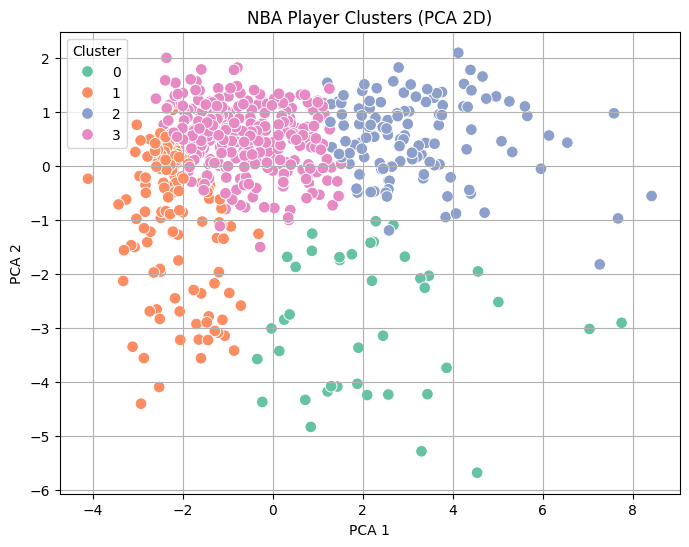

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set2", s=70)
plt.title("NBA Player Clusters (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


In [ ]:
df.groupby("Cluster")[["PTS", "AST", "TRB", "STL", "BLK"]].mean().round(1)


,PTS,AST,TRB,STL,BLK
Cluster,,,,,
0,750.0,116.2,520.3,45.6,90.9
1,87.9,21.1,59.0,8.0,7.8
2,1242.3,319.6,363.9,69.4,36.7
3,355.3,81.2,138.3,28.1,14.7


In [ ]:
import numpy as np

# Step 1: Get PCA coordinates and cluster centers
from sklearn.metrics import pairwise_distances_argmin_min

# Store PCA columns
X_pca = df[["PCA1", "PCA2"]].values

# Calculate cluster centers in PCA space
cluster_centers = df.groupby("Cluster")[["PCA1", "PCA2"]].mean().values

# Step 2: Calculate distance from each point to every cluster center
from scipy.spatial.distance import cdist
distances = cdist(X_pca, cluster_centers)

# Step 3: For each player, get:
# - Their assigned cluster center distance
# - Nearest *other* cluster center
assigned_cluster = df["Cluster"].values
player_dist_to_own = distances[np.arange(len(distances)), assigned_cluster]
dist_to_next_best = np.partition(distances, 1, axis=1)[:, 1]  # second closest center

# Step 4: Define players near other clusters
borderline_mask = (dist_to_next_best - player_dist_to_own) < 0.5  # tweak threshold

# Step 5: Define edge players (furthest from their cluster center)
cluster_radii = {}
for c in range(4):
    dists = player_dist_to_own[assigned_cluster == c]
    threshold = np.percentile(dists, 85)  # furthest 15% in the cluster
    cluster_radii[c] = threshold
edge_mask = np.array([player_dist_to_own[i] > cluster_radii[assigned_cluster[i]] for i in range(len(df))])

# Combine both sets
label_mask = borderline_mask | edge_mask


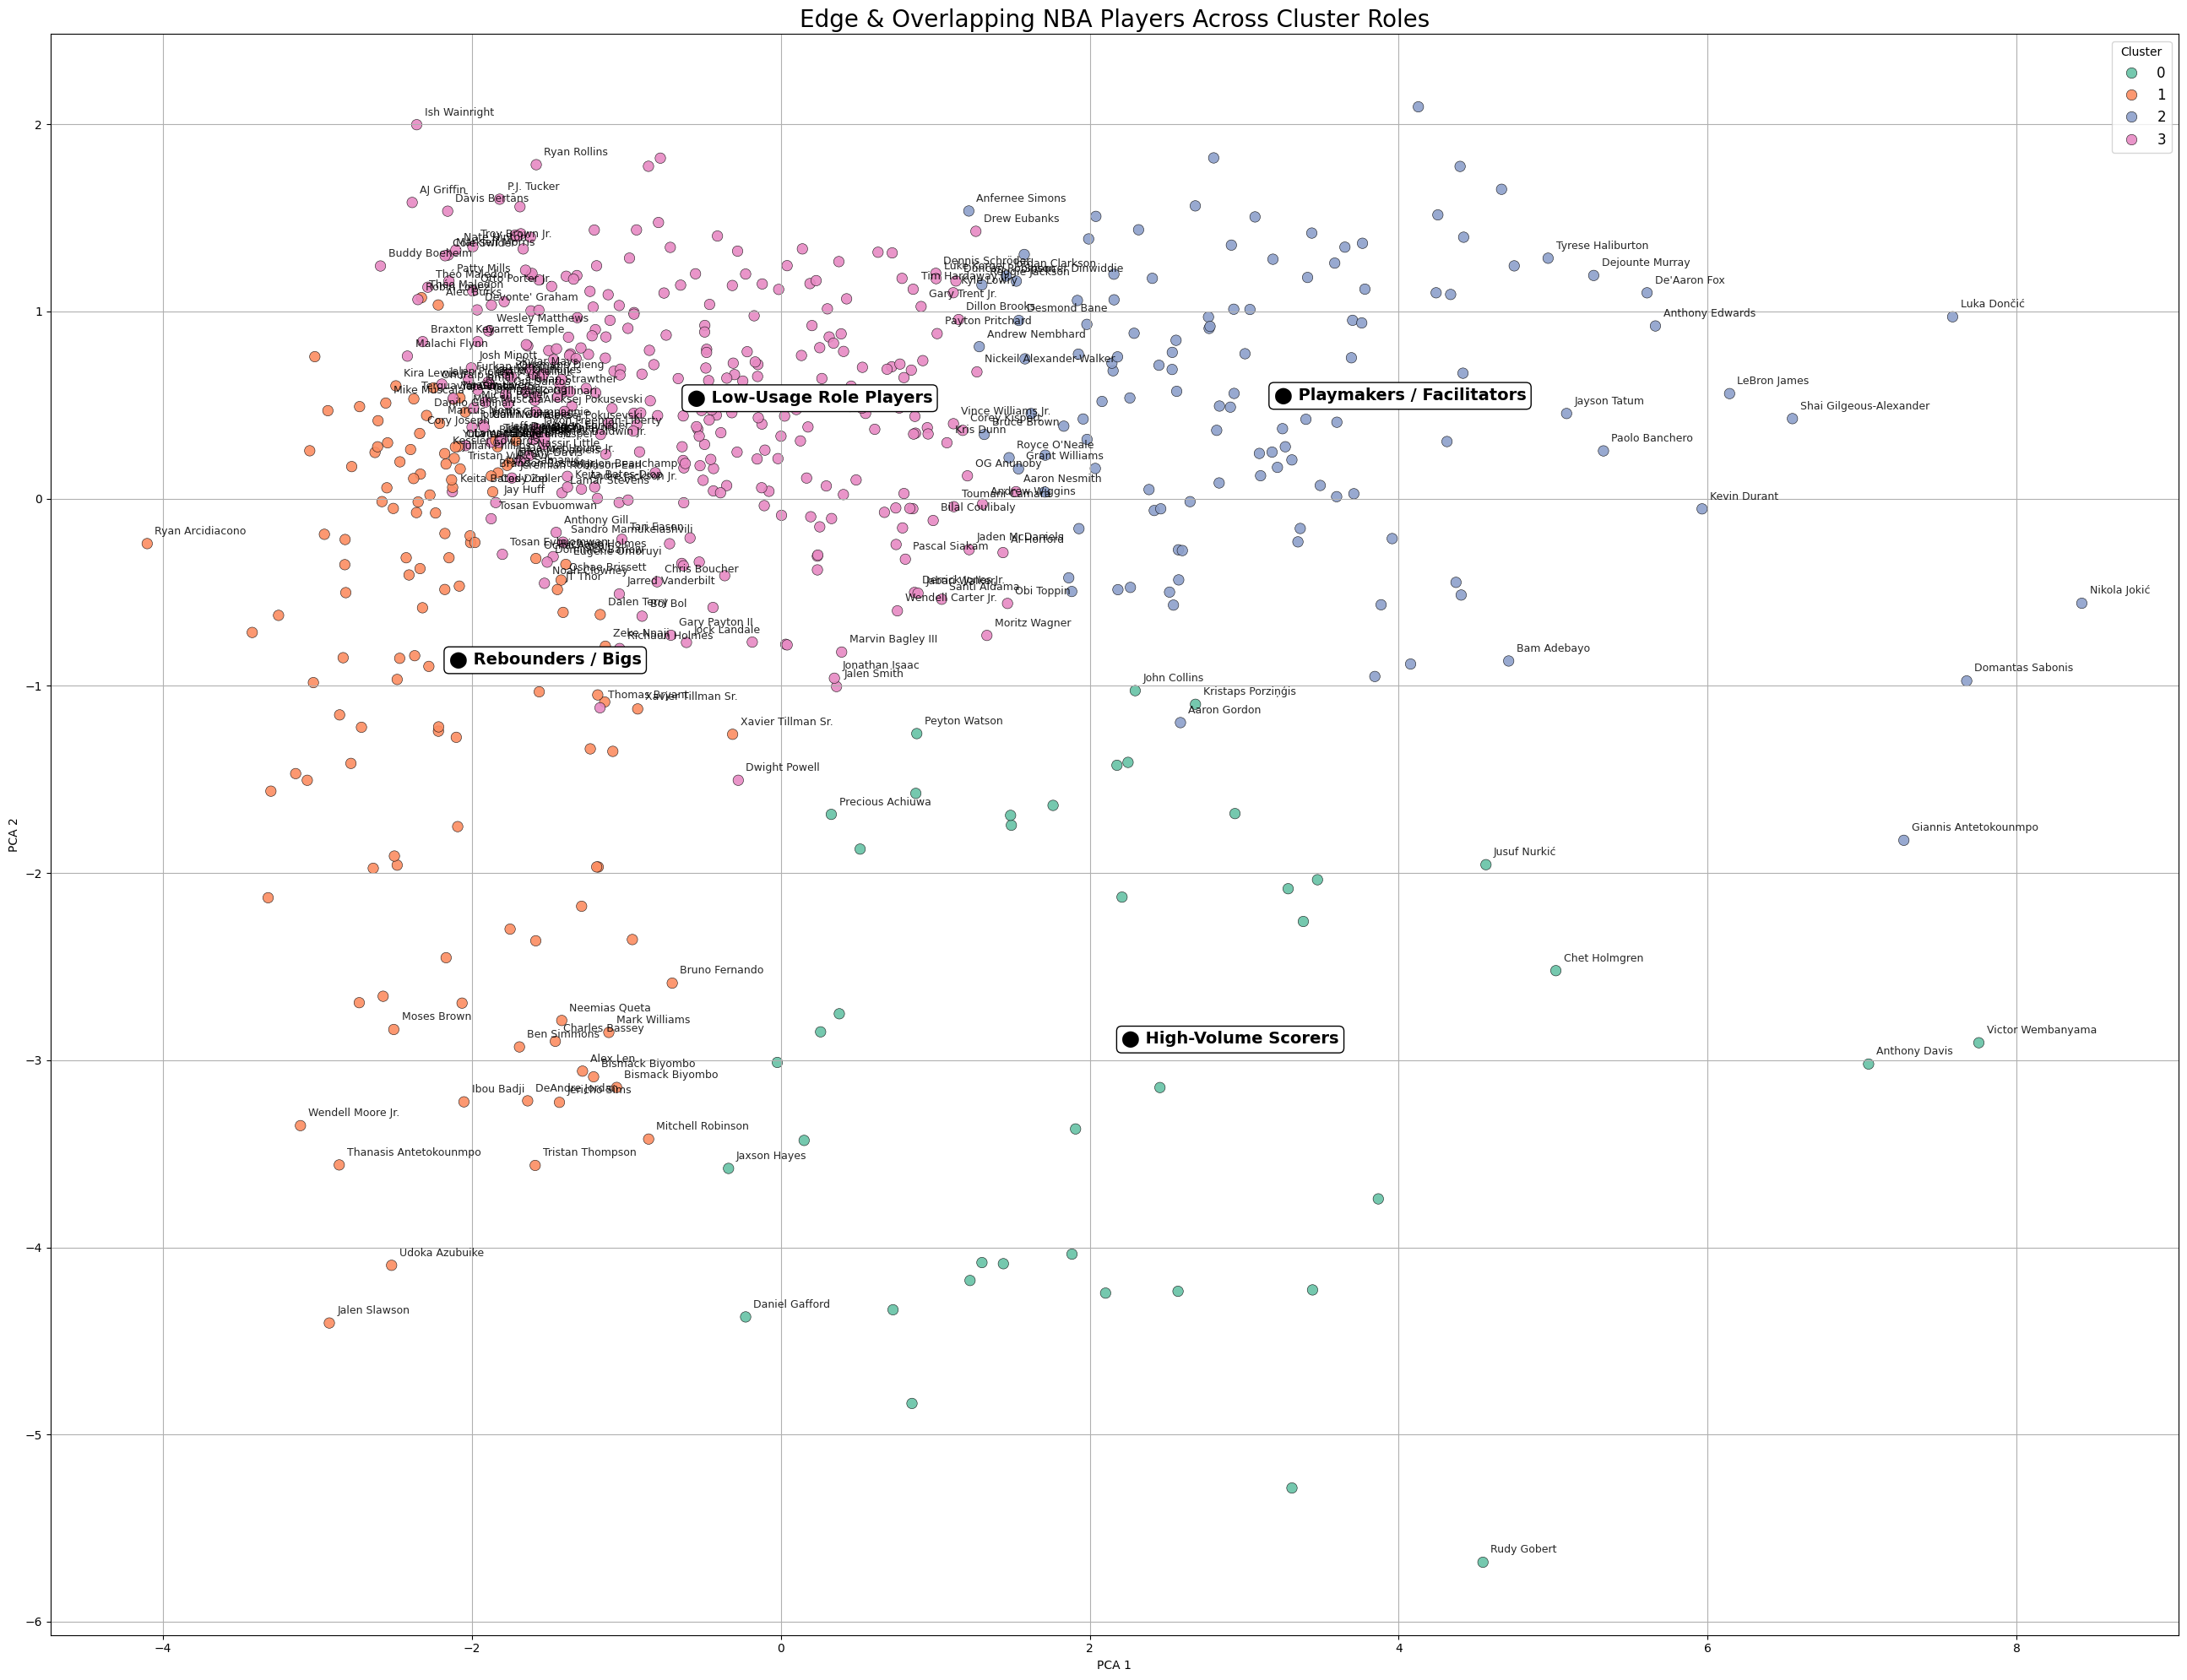

In [ ]:
plt.figure(figsize=(26, 20))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", s=80, edgecolor='black', linewidth=0.4, alpha=0.9)

# Show names only for edge/borderline players
for i in range(len(df)):
    if label_mask[i]:
        plt.text(df.iloc[i]["PCA1"] + 0.05,
                 df.iloc[i]["PCA2"] + 0.05,
                 df.iloc[i]["Player"],
                 fontsize=9, alpha=0.85)

# Optional: plot cluster role labels again (reuse from earlier)
for c, label in {
    0: "High-Volume Scorers",
    1: "Rebounders / Bigs",
    2: "Playmakers / Facilitators",
    3: "Low-Usage Role Players"
}.items():
    x_mean = df[df["Cluster"] == c]["PCA1"].mean()
    y_mean = df[df["Cluster"] == c]["PCA2"].mean()
    plt.text(x_mean, y_mean, f"⬤ {label}", fontsize=14, weight="bold",
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

plt.title("Edge & Overlapping NBA Players Across Cluster Roles", fontsize=20)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster", fontsize=12)
plt.show()


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your cleaned NBA player data
df = pd.read_csv("/content/nba_cleaned_with_pca_clusters.csv")

# Select features used for clustering (make sure these match your original cluster project)
feature_cols = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]

# Filter and scale
features = df[feature_cols].fillna(0)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 1: Scrape data
url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"
res = requests.get(url)
res.encoding = "utf-8"
soup = BeautifulSoup(res.text, "html.parser")
table = soup.find("table", {"id": "totals_stats"})
df = pd.read_html(StringIO(str(table)))[0]
df = df[df["Player"] != "Player"]
df.reset_index(drop=True, inplace=True)

# Step 2: Convert numeric columns
for col in df.columns[5:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df = df[df["G"] >= 10]
df["Player"] = df["Player"].str.strip()
df = df.drop(columns=["Rk", "Awards"], errors="ignore")

# Step 3: Clustering prep
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Step 4: K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Step 5: PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

# Step 6: Save
df.to_csv("nba_cleaned_with_pca_clusters.csv", index=False)


In [4]:
from google.colab import files
files.download("nba_cleaned_with_pca_clusters.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
import pandas as pd

# Adjust if the filename is different
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")
df.head()


,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Trp-Dbl,Cluster,PCA1,PCA2
0,Luka Dončić,24.0,DAL,PG,70.0,70.0,2624.0,804.0,1652.0,0.487,...,686.0,99.0,38.0,282.0,149.0,2370.0,21.0,2,7.585971,0.971179
1,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,2553.0,796.0,1487.0,0.535,...,465.0,150.0,67.0,162.0,184.0,2254.0,0.0,2,6.548835,0.427279
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,2567.0,837.0,1369.0,0.611,...,476.0,87.0,79.0,250.0,210.0,2222.0,10.0,2,7.270196,-1.825397
3,Jalen Brunson,27.0,NYK,PG,77.0,77.0,2726.0,790.0,1648.0,0.479,...,519.0,70.0,13.0,186.0,144.0,2212.0,0.0,2,4.665625,1.652434
4,Nikola Jokić,28.0,DEN,C,79.0,79.0,2737.0,822.0,1411.0,0.583,...,708.0,108.0,68.0,237.0,194.0,2085.0,25.0,2,8.422472,-0.558985


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select the same features used in original clustering
features = df[["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Recreate original clusters
kmeans = KMeans(n_clusters=4, random_state=42)
features_scaled = features_scaled.fillna(0)

original_labels = kmeans.fit_predict(features_scaled)


In [10]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load cleaned dataset with PCA and cluster labels
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")

# Optional: Drop non-numeric columns if present
df_numeric = df.select_dtypes(include=[np.number])


In [11]:
# Select the same features used originally
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy()
X = X.fillna(0)  # Fix NaNs if any

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [12]:
# Run KMeans again on the original (scaled) data
kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans.fit_predict(X_scaled)

# Save for later comparison
df["Cluster"] = original_labels


In [13]:
# Add Gaussian noise to simulate instability
X_noisy = X_scaled + np.random.normal(0, 0.2, size=X_scaled.shape)

# Run KMeans on noisy data
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
noisy_labels = kmeans_noisy.fit_predict(X_noisy)

df["Noisy_Cluster"] = noisy_labels


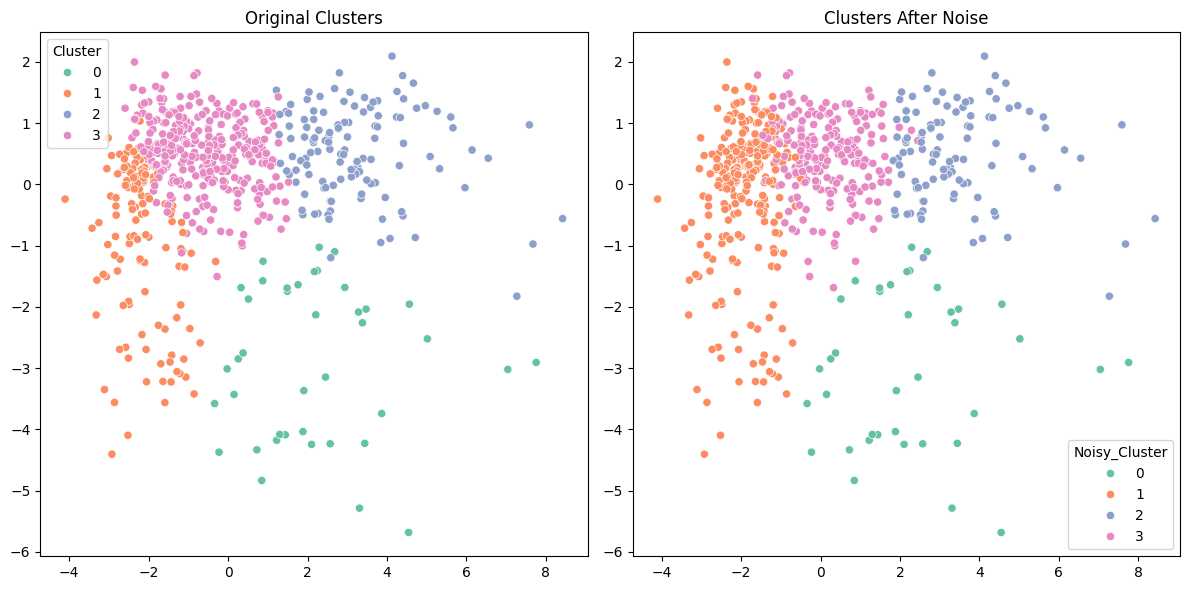

In [14]:
plt.figure(figsize=(12, 6))

# Plot original clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="Set2")
plt.title("Original Clusters")

# Plot noisy clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Noisy_Cluster"], palette="Set2")
plt.title("Clusters After Noise")

plt.tight_layout()
plt.show()


In [15]:
# Compare original and noisy cluster labels
df["Cluster_Changed"] = df["Cluster"] != df["Noisy_Cluster"]

# Filter only those who changed
shifted_players = df[df["Cluster_Changed"]][["Player", "Cluster", "Noisy_Cluster"]]

# Count how many moved
print(f"🔁 {len(shifted_players)} players changed clusters after noise.\n")
shifted_players.head(20)  # show sample


🔁 144 players changed clusters after noise.



,Player,Cluster,Noisy_Cluster
74,RJ Barrett,2,3
75,RJ Barrett,3,1
82,Jerami Grant,2,3
98,Anfernee Simons,2,3
101,Grayson Allen,2,3
103,Buddy Hield,2,3
108,Desmond Bane,2,3
116,Jordan Clarkson,2,3
138,Bojan Bogdanović,3,1
141,Luguentz Dort,2,3


from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Noisy_Cluster'].plot(kind='hist', bins=20, title='Noisy_Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Cluster', y='Noisy_Cluster', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Noisy_Cluster'].plot(kind='line', figsize=(8, 4), title='Noisy_Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Compare original and noisy cluster labels
df["Cluster_Changed"] = df["Cluster"] != df["Noisy_Cluster"]

# Filter only those who changed
shifted_players = df[df["Cluster_Changed"]][["Player", "Cluster", "Noisy_Cluster"]]

# Count how many moved
print(f" {len(shifted_players)} players changed clusters after noise.\n")
shifted_players.head(20)  # show sample


🔁 144 players changed clusters after noise.



,Player,Cluster,Noisy_Cluster
74,RJ Barrett,2,3
75,RJ Barrett,3,1
82,Jerami Grant,2,3
98,Anfernee Simons,2,3
101,Grayson Allen,2,3
103,Buddy Hield,2,3
108,Desmond Bane,2,3
116,Jordan Clarkson,2,3
138,Bojan Bogdanović,3,1
141,Luguentz Dort,2,3


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# STEP 1: Load cleaned NBA data
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")

# STEP 2: Select features and scale
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 3: Original KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# STEP 4: Add noise and re-cluster
X_noisy = X_scaled + np.random.normal(0, 0.2, size=X_scaled.shape)
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
df["Noisy_Cluster"] = kmeans_noisy.fit_predict(X_noisy)
df["Shifted"] = df["Cluster"] != df["Noisy_Cluster"]

# STEP 5: Compare shifts
shifted_df = df[df["Shifted"]].copy()
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_noisy_df = pd.DataFrame(X_noisy, columns=features)
delta_df = X_noisy_df.iloc[shifted_df.index] - X_scaled_df.iloc[shifted_df.index]

# Build shift dataframe
final_shift = delta_df.copy()
final_shift["Player"] = df.loc[shifted_df.index, "Player"]
final_shift["From_Cluster"] = df.loc[shifted_df.index, "Cluster"]
final_shift["To_Cluster"] = df.loc[shifted_df.index, "Noisy_Cluster"]

# STEP 6: Human-readable clusters
cluster_names = {
    0: "Volume Scorers",
    1: "Rebounders / Bigs",
    2: "Efficient Guards",
    3: "Low-Usage / Role Players"
}

final_shift["From_Label"] = final_shift["From_Cluster"].map(cluster_names)
final_shift["To_Label"] = final_shift["To_Cluster"].map(cluster_names)

# STEP 7: Add top shifting stat
def get_top_stat(row):
    stat_diff = row[features].abs()
    max_stat = stat_diff.idxmax()
    direction = "increased" if row[max_stat] > 0 else "decreased"
    return f"{max_stat} {direction}"

final_shift["Key_Stat_Change"] = final_shift.apply(get_top_stat, axis=1)

# STEP 8: Clean final output
final_named_output = final_shift[[
    "Player", "From_Label", "To_Label", "Key_Stat_Change"
]].sort_values("Player").reset_index(drop=True)

# STEP 9: Show top rows
final_named_output.head(20)


,Player,From_Label,To_Label,Key_Stat_Change
0,A.J. Lawson,Rebounders / Bigs,Low-Usage / Role Players,FT% decreased
1,Aaron Gordon,Efficient Guards,Volume Scorers,AST increased
2,Aaron Holiday,Low-Usage / Role Players,Volume Scorers,TRB increased
3,Aaron Nesmith,Low-Usage / Role Players,Volume Scorers,AST decreased
4,Aaron Wiggins,Low-Usage / Role Players,Volume Scorers,TRB increased
5,Al Horford,Low-Usage / Role Players,Volume Scorers,TRB decreased
6,Alec Burks,Rebounders / Bigs,Low-Usage / Role Players,AST decreased
7,Aleksej Pokusevski,Rebounders / Bigs,Low-Usage / Role Players,TOV decreased
8,Amari Bailey,Rebounders / Bigs,Low-Usage / Role Players,3P% decreased
9,Andrew Nembhard,Efficient Guards,Volume Scorers,3P% increased


In [19]:
# Export the final_named_output DataFrame to CSV
final_named_output.to_csv("shifted_players_cluster_analysis.csv", index=False)

# Generate a download link (for Colab)
from google.colab import files
files.download("shifted_players_cluster_analysis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Load your cleaned NBA data
df = pd.read_csv("/content/nba_cleaned_with_pca_clusters.csv")

# 2. Define features used for clustering
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy().fillna(0)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Original clustering
original_kmeans = KMeans(n_clusters=4, random_state=42)
original_labels = original_kmeans.fit_predict(X_scaled)

# 5. Add Gaussian noise + recluster
np.random.seed(42)
noise = np.random.normal(0, 0.05, size=X_scaled.shape)
X_noisy = X_scaled + noise
noisy_kmeans = KMeans(n_clusters=4, random_state=42)
shifted_labels = noisy_kmeans.fit_predict(X_noisy)

# 6. Create full shifted DataFrame
shifted_players_df = df[["Player"]].copy()
shifted_players_df["original_cluster"] = original_labels
shifted_players_df["shifted_cluster"] = shifted_labels

# 7. Label clusters (customize names)
cluster_names = {
    0: "Defensive Bigs",
    1: "Offensive Wings",
    2: "All-Around Guards",
    3: "Scoring Forwards"
}
shifted_players_df["original_cluster_name"] = shifted_players_df["original_cluster"].map(cluster_names)
shifted_players_df["shifted_cluster_name"] = shifted_players_df["shifted_cluster"].map(cluster_names)


In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("nba_cleaned_with_pca_clusters.csv")

# Use the original clustering features
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].copy()

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)



In [6]:
import numpy as np

np.random.seed(42)
noise = np.random.normal(loc=0, scale=0.3, size=features_scaled.shape)
noisy_features = features_scaled + noise


In [10]:
print(X.isna().sum())


PTS    0
AST    0
TRB    0
STL    0
BLK    0
TOV    0
FG%    0
3P%    0
FT%    0
dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)


In [8]:
# Fill NaNs with 0 or mean (choose what makes sense)
X = X.fillna(0)  # or: X = X.fillna(X.mean())

# Rescale after fixing NaNs
features_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.cluster import KMeans

kmeans_original = KMeans(n_clusters=4, random_state=42)
original_labels = kmeans_original.fit_predict(features_scaled)


In [13]:
import numpy as np

# Add small noise to test robustness
noise = np.random.normal(0, 0.1, size=features_scaled.shape)
features_noisy = features_scaled + noise

# Run KMeans on noisy data
kmeans_noisy = KMeans(n_clusters=4, random_state=42)
noisy_labels = kmeans_noisy.fit_predict(features_noisy)


In [14]:
# Step 1: Create a new DataFrame with original and noisy cluster labels
cluster_compare = df[["Player"]].copy()
cluster_compare["Original_Cluster"] = original_labels
cluster_compare["Noisy_Cluster"] = noisy_labels

# Step 2: Identify players whose cluster changed
cluster_compare["Changed"] = cluster_compare["Original_Cluster"] != cluster_compare["Noisy_Cluster"]
changed_players = cluster_compare[cluster_compare["Changed"] == True].copy()

# Step 3: Merge features for deeper insight
changed_players = changed_players.merge(df[["Player", "PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]], on="Player", how="left")

# Step 4: Map cluster labels to human-readable roles
role_map = {
    0: "Scoring Guards",
    1: "Defensive Bigs",
    2: "Two-Way Wings",
    3: "Playmaking Forwards"
}
changed_players["From"] = changed_players["Original_Cluster"].map(role_map)
changed_players["To"] = changed_players["Noisy_Cluster"].map(role_map)

# Step 5: Reorder and export
changed_players = changed_players[["Player", "From", "To", "PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]]
changed_players.to_csv("players_changed_clusters.csv", index=False)
changed_players.head(10)


,Player,From,To,PTS,AST,TRB,STL,BLK,TOV,FG%,3P%,FT%
0,Anthony Davis,Scoring Guards,Two-Way Wings,1876.0,266.0,961.0,91.0,178.0,159.0,0.556,0.271,0.816
1,Pascal Siakam,Playmaking Forwards,Scoring Guards,1737.0,342.0,565.0,63.0,25.0,141.0,0.536,0.346,0.732
2,Pascal Siakam,Playmaking Forwards,Scoring Guards,865.0,190.0,246.0,32.0,10.0,83.0,0.522,0.317,0.758
3,Pascal Siakam,Playmaking Forwards,Scoring Guards,872.0,152.0,319.0,31.0,15.0,58.0,0.549,0.386,0.699
4,Pascal Siakam,Playmaking Forwards,Scoring Guards,1737.0,342.0,565.0,63.0,25.0,141.0,0.536,0.346,0.732
5,Pascal Siakam,Playmaking Forwards,Scoring Guards,865.0,190.0,246.0,32.0,10.0,83.0,0.522,0.317,0.758
6,Pascal Siakam,Playmaking Forwards,Scoring Guards,872.0,152.0,319.0,31.0,15.0,58.0,0.549,0.386,0.699
7,Victor Wembanyama,Scoring Guards,Two-Way Wings,1522.0,274.0,755.0,88.0,254.0,260.0,0.465,0.325,0.796
8,Cam Thomas,Two-Way Wings,Scoring Guards,1482.0,192.0,214.0,45.0,16.0,124.0,0.442,0.364,0.856
9,Klay Thompson,Two-Way Wings,Scoring Guards,1375.0,176.0,254.0,50.0,35.0,117.0,0.432,0.387,0.927


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
X = df[features].fillna(0)

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(X)

# Fit KMeans again (use same cluster count as earlier)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)


KMeans(n_clusters=4, random_state=42)

In [19]:
# Assign clusters and compute distances to cluster centers
from sklearn.metrics import pairwise_distances_argmin_min

df["Cluster"] = kmeans.labels_
df["Distance"] = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]


In [20]:
# Number of outliers to display per cluster
top_n = 5

# Sort and extract top outliers per cluster
outliers = df.sort_values("Distance", ascending=False).groupby("Cluster").head(top_n)

# Show result
outliers[["Player", "Cluster", "Distance"]]


,Player,Cluster,Distance
29,Victor Wembanyama,0,7.599791
617,Ryan Arcidiacono,1,6.587215
340,Luke Kornet,3,6.239963
27,Domantas Sabonis,2,5.950416
313,Drew Eubanks,3,5.765160
4,Nikola Jokić,2,5.722892
11,Anthony Davis,0,5.407817
0,Luka Dončić,2,4.939825
2,Giannis Antetokounmpo,2,4.905725
615,Jalen Slawson,1,4.581375


In [21]:
# New multi-skilled role names for clusters
role_names = {
    0: "Two-Way Threat",     # Good scoring + defense (steals/blocks)
    1: "Paint Protector",    # High rebounds + blocks, low TOV
    2: "Floor General",      # High assists, AST/TOV, solid scoring
    3: "Glass Cleaner"       # Strong rebounding + physical presence
}

# Map them in the dataframe
df["Role"] = df["Cluster"].map(role_names)
outliers["Role"] = outliers["Cluster"].map(role_names)

# Preview updated misfits with role names
outliers[["Player", "Role", "Distance"]]


,Player,Role,Distance
29,Victor Wembanyama,Two-Way Threat,7.599791
617,Ryan Arcidiacono,Paint Protector,6.587215
340,Luke Kornet,Glass Cleaner,6.239963
27,Domantas Sabonis,Floor General,5.950416
313,Drew Eubanks,Glass Cleaner,5.765160
4,Nikola Jokić,Floor General,5.722892
11,Anthony Davis,Two-Way Threat,5.407817
0,Luka Dončić,Floor General,4.939825
2,Giannis Antetokounmpo,Floor General,4.905725
615,Jalen Slawson,Paint Protector,4.581375


In [34]:
# See all column names in your current DataFrame
print(df.columns.tolist())

# Optional: preview a few rows
df.head()


['Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Cluster', 'PCA1', 'PCA2', 'Distance', 'Role', 'PC1', 'PC2']


,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,PF,PTS,Trp-Dbl,Cluster,PCA1,PCA2,Distance,Role,PC1,PC2
0,Luka Dončić,24.0,DAL,PG,70.0,70.0,2624.0,804.0,1652.0,0.487,...,149.0,2370.0,21.0,2,7.585971,0.971179,4.217680,Floor General,7.585971,0.971179
1,Shai Gilgeous-Alexander,25.0,OKC,PG,75.0,75.0,2553.0,796.0,1487.0,0.535,...,184.0,2254.0,0.0,2,6.548835,0.427279,3.590517,Floor General,6.548835,0.427279
2,Giannis Antetokounmpo,29.0,MIL,PF,73.0,73.0,2567.0,837.0,1369.0,0.611,...,210.0,2222.0,10.0,2,7.270196,-1.825397,4.371321,Floor General,7.270196,-1.825397
3,Jalen Brunson,27.0,NYK,PG,77.0,77.0,2726.0,790.0,1648.0,0.479,...,144.0,2212.0,0.0,2,4.665625,1.652434,2.563945,Floor General,4.665625,1.652434
4,Nikola Jokić,28.0,DEN,C,79.0,79.0,2737.0,822.0,1411.0,0.583,...,194.0,2085.0,25.0,2,8.422472,-0.558985,5.036006,Floor General,8.422472,-0.558985


Role  Floor General  Glass Cleaner  Paint Protector  Two-Way Threat
Team                                                               
2TM              12             43                7               1
3TM               0              3                3               0
ATL               4              6                3               2
BOS               4              6                4               1
BRK               2             11                2               2
CHI               5              4                4               1
CHO               2             14                4               1
CLE               4              5                5               2
DAL               2             11                3               1
DEN               6              7                1               1
DET               2             14                5               3
GSW               6              6                2               2
HOU               4              9              

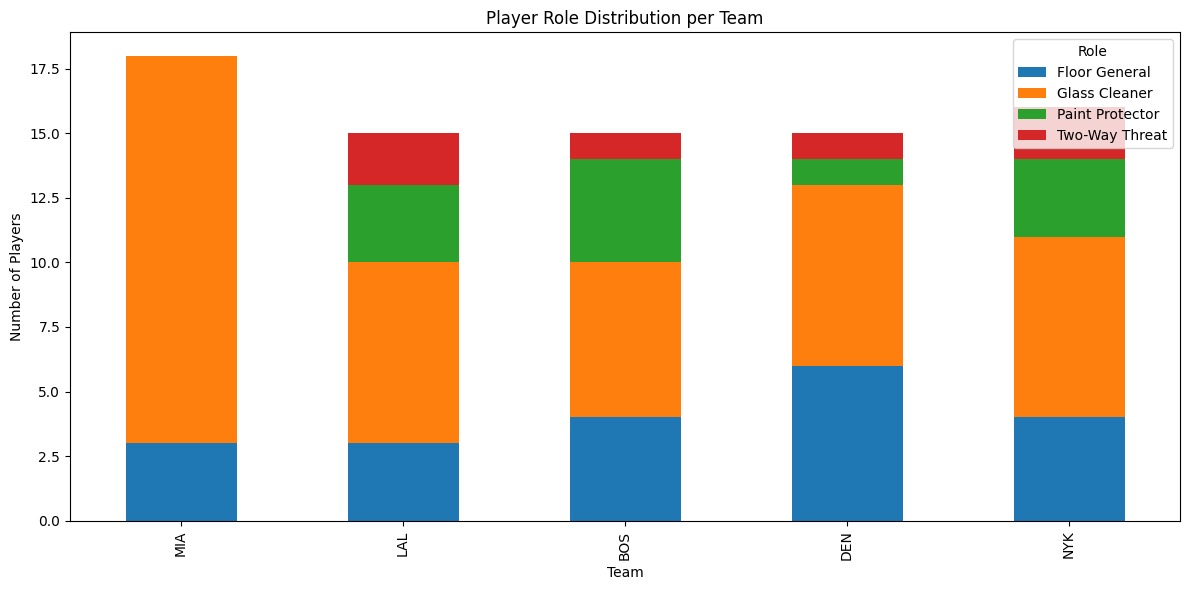

In [35]:
# Count how many players of each Role each Team has
team_role_counts = df.groupby(["Team", "Role"]).size().unstack(fill_value=0)

# Display
print(team_role_counts)

# Optional: Bar plot of a few teams (edit teams list if needed)
import matplotlib.pyplot as plt

teams_to_plot = ["MIA", "LAL", "BOS", "DEN", "NYK"]  # Customize this list
team_role_counts.loc[teams_to_plot].plot(kind="bar", figsize=(12, 6), stacked=True)
plt.title("Player Role Distribution per Team")
plt.ylabel("Number of Players")
plt.xlabel("Team")
plt.legend(title="Role")
plt.tight_layout()
plt.show()


In [28]:
from sklearn.preprocessing import StandardScaler

# Select clustering features again
features = ["PTS", "AST", "TRB", "STL", "BLK", "TOV", "FG%", "3P%", "FT%"]
features_df = df[features].copy()

# Drop any rows with NaNs before scaling
features_df = features_df.dropna()

# Re-align the main df to match the cleaned feature set
df = df.loc[features_df.index]

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_df)


In [30]:
# Refit clustering with clean feature set
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features_scaled)  # only 586 samples now
df["Cluster"] = kmeans.labels_


In [31]:
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np

# Calculate distances
distances = pairwise_distances_argmin_min(features_scaled, kmeans.cluster_centers_)[1]
df["Distance"] = distances

# Borderline = top 30% farthest from center
threshold = np.percentile(distances, 70)
border_players = df[df["Distance"] >= threshold]


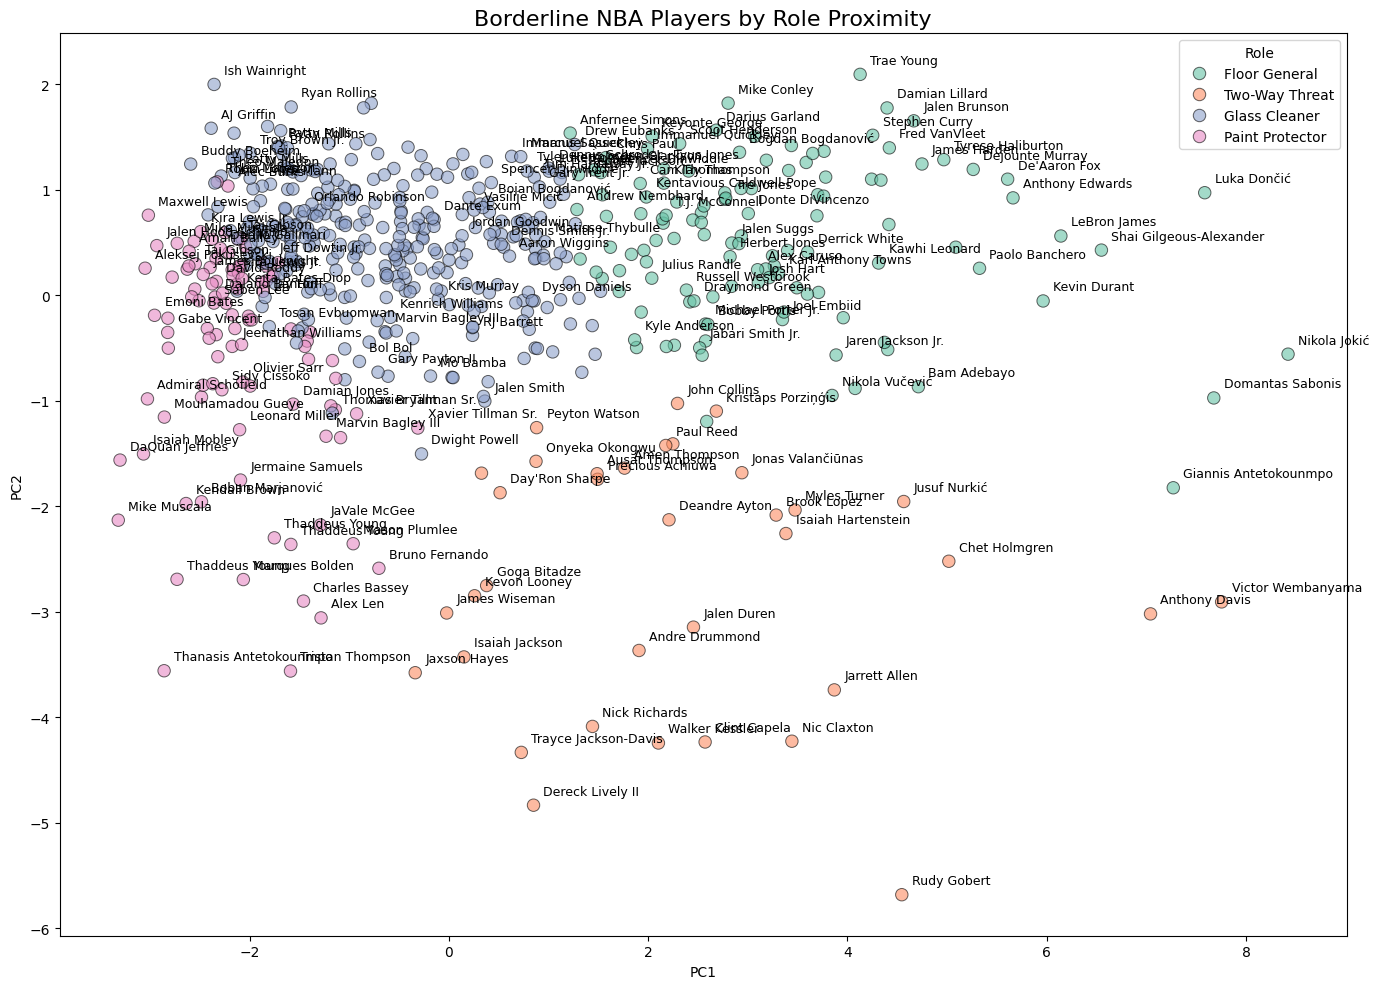

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# Base scatterplot
sns.scatterplot(
    data=df,
    x="PC1", y="PC2",
    hue="Role",
    palette="Set2",
    s=80,
    edgecolor="black",
    alpha=0.6
)

# Show names only for borderline players
for _, row in border_players.iterrows():
    plt.text(row["PC1"] + 0.1, row["PC2"] + 0.1, row["Player"], fontsize=9, color="black")

plt.title("Borderline NBA Players by Role Proximity", fontsize=16)
plt.tight_layout()
plt.savefig("NBA_Borderline_Players.png", dpi=300)  # Optional save
plt.show()


In [23]:
from sklearn.decomposition import PCA

# Apply PCA to scaled features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Add PCA components to DataFrame
df["PC1"] = pca_result[:, 0]
df["PC2"] = pca_result[:, 1]
